<font color=blue size=6 face=微软雅黑>**泰坦尼克号生存分析及预测**</font>

# 导入数据

In [137]:
import pandas as pd
import numpy as np

In [138]:
train = pd.read_csv('train.csv')

In [139]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [140]:
print('Pclass:'+ str(train['Pclass'].unique()))#观测列的值
print('Embarked:'+ str(train['Embarked'].unique()))#观测列的值

Pclass:[3 1 2]
Embarked:['S' 'C' 'Q' nan]


## 字段解释：

字段解释：

Passengerid:用户编号；

Pclass:描述用户所属的船舱等级，总共分为三等，用1、2、3来描述，其中：
1 - 1st class，头等舱用户；
2 - 2nd class，次等仓用户；
3 - 3rd class，三等舱用户；

Name: 描述乘客的全名。例如上例中的 Heikkien, Miss. Laina 中：
Rugg ：first name，即名；
Miss. ：title，即称谓；
Emily ：last name，即姓

Sex:描述乘客的性别，其中：
male - 男性；
female - 女性；

SibSp:描述了泰坦尼克号上与乘客同行的兄弟姐妹（Siblings）和配偶（Spouse）数目；

Parch:描述了泰坦尼克号上与乘客同行的家长（Parents）和孩子（Children）数目；

Ticket:描述乘客登船所使用的船票编号；

Fare:描述乘客上船所花费的费用；

Cabin:描述用户所住的船舱编号。由两部分组成，仓位号和房间编号，如C88中，C和88分别对应C仓位和88号房间；

Embarked:描述乘客上船时的港口，包含三种类型：
C：Cherbourg；
Q：Queenstown；
S：Southampton；

Survived:是否生存，生存为1，遇难为0

## 数据基本信息

In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Survived       1309 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


1.可见总共有891行数据；
2.年龄列(Age)只有714条数据；
3.船舱编号(Cabin):只有204条数据；
4.上船港口(Embarked):缺失两条数据。
信息格式分为整数-int，浮点数-float64，字母-object

In [142]:
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.377387
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.484918
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


描述性统计：
1.在891个乘客中，只有38%的人生存下来；
2.乘客的平均年龄为29.6岁，最小的为年龄不到5个月，最大的年龄为80岁，4分之三分位数为38岁，可见船上人还是以20-38年龄的的人为主；
3.乘客与兄弟姐妹伴侣同行要比父母孩子同行数量要高(0.52>0.38),最多有8名乘客同行，父母孩子同行数最多为6人；
4.此次上船花费均值在32美元，最高512美金。

## 数据填充

In [143]:
train['Embarked'].value_counts()  #S为最多

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [144]:
#用平均值填充空值
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())
#用出现频率最多的填充空值
train['Embarked'] = train['Embarked'].fillna( 'S' )

In [145]:
train['Cabin'] = train['Cabin'].fillna( 'Unknown')

In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Survived       1309 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


# 特征分析

## 舱位，性别与生还率的关系 

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Survived count')

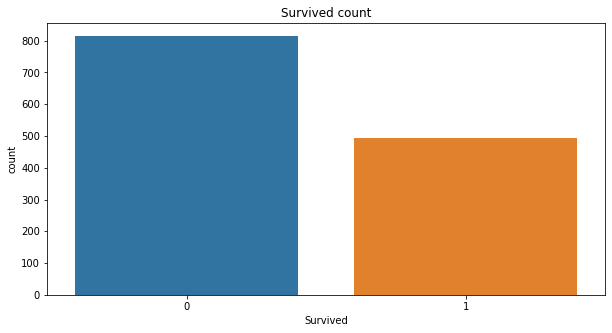

In [148]:
plt.figure(figsize = (10,5)) # 创建画布
sns.countplot(x='Survived',data=train)
plt.title('Survived count')

<Figure size 720x360 with 0 Axes>

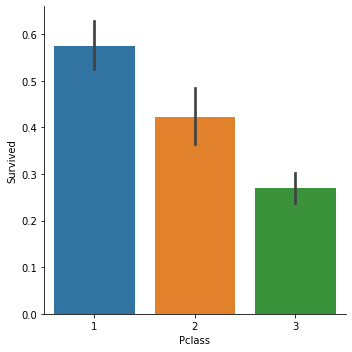

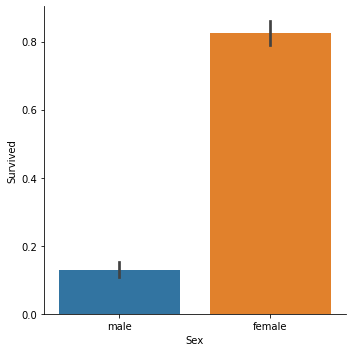

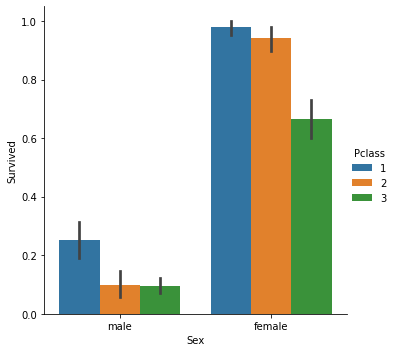

In [149]:
plt.figure(figsize= (10 ,5))
sns.catplot(data=train,x="Pclass",y="Survived",kind='bar') # 舱位生还比率
sns.catplot(data=train,x="Sex",y="Survived",kind='bar') # 性别生还比率
sns.catplot(data=train,x="Sex",y="Survived",hue = 'Pclass',kind='bar') # 舱位性别生还率
plt.show()

1.单从舱位来讲，等级越高，生还率越高；
2.从性别来讲，女性生还率比男性要高；
3.男性中二等舱与三等舱生还率接近，女性中头等舱和二等舱生还率接近。

## 年龄与生还率关系

In [150]:
train['AgeGroup'] = pd.cut(train['Age'],5) # 将年龄的列数值划分为五等份

In [151]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,AgeGroup
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,0,"(16.136, 32.102]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,"(32.102, 48.068]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,"(16.136, 32.102]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,"(32.102, 48.068]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,"(32.102, 48.068]"


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

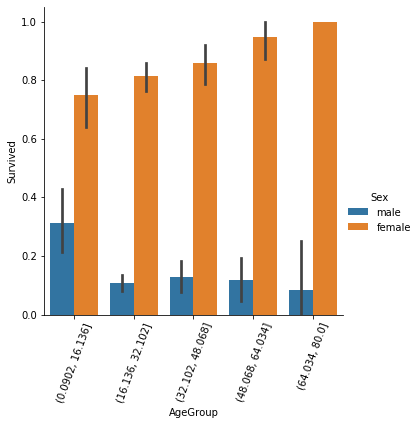

In [152]:
sns.catplot(data=train,x="AgeGroup",y="Survived",hue = 'Sex',kind='bar') # 舱位性别生还率
plt.xticks(rotation = 70)

1.可见男性来讲大于16岁的生存率很低，在各个年龄区间差不多，生存率最高的是小于16岁的儿童。2.女性年纪越大生存率越高

## 港口进出与生还率关系

<Figure size 720x360 with 0 Axes>

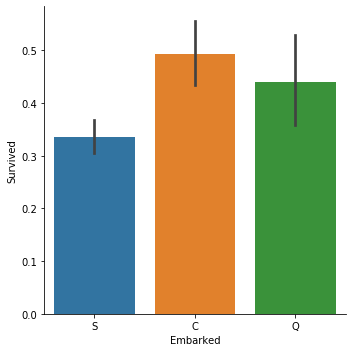

In [153]:
plt.figure(figsize = (10,5)) # 创建画布
sns.catplot(data=train,x="Embarked",y="Survived",kind='bar') # 港口生还率


可见从C港口上船的乘客生存率较高

## 票价与生存率的关系

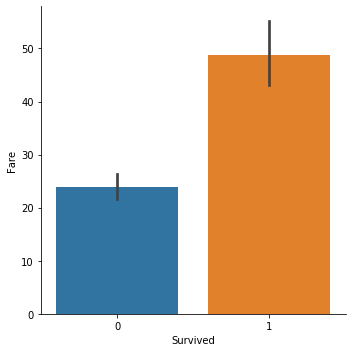

In [154]:
sns.catplot(data=train,x="Survived",y="Fare",kind='bar') # 平均票价

可见票价高的乘客整体生存率更高

## 有无兄弟姐妹配偶/父母孩子与生存率的关系

Text(0.5, 0, 'no_parch')

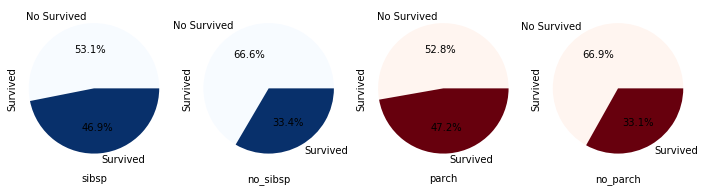

In [155]:

sibsp_df = train[train['SibSp'] != 0]
no_sibsp_df = train[train['SibSp'] == 0]
# 筛选出有无兄弟姐妹数据

parch_df = train[train['Parch'] != 0]  
no_parch_df = train[train['Parch'] == 0]
# 筛选出有无父母子女数据

plt.figure(figsize=(12,3))
plt.subplot(141)
plt.axis('equal')
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%',colormap = 'Blues')
plt.xlabel('sibsp')
 
plt.subplot(142)
plt.axis('equal')
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%',colormap = 'Blues')
plt.xlabel('no_sibsp')

plt.subplot(143)  
plt.axis('equal')
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct= '%1.1f%%',colormap = 'Reds')  
plt.xlabel('parch')  
 
plt.subplot(144)  
plt.axis('equal')
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%',colormap = 'Reds')  
plt.xlabel('no_parch')

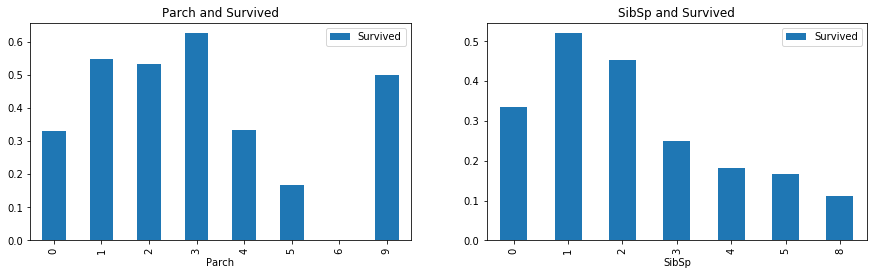

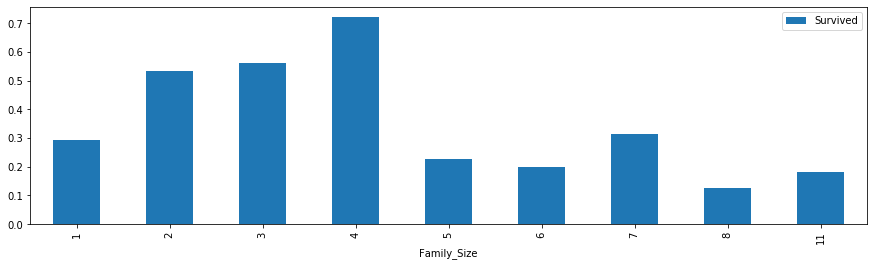

In [156]:
# 亲戚多少与存活与否的关系

fig, ax=plt.subplots(1,2,figsize=(15,4))
train[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')
# 查看兄弟姐妹个数与存活率

train['Family_Size'] = train['Parch'] + train['SibSp']+1
train[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar(figsize = (15,4))
# 查看父母子女个数与存活率

# 特征工程

## 分类数据数值化one-hot Encode

### Embarked列

In [157]:
embarkedDf = pd.get_dummies(train['Embarked'] , prefix='Embarked' )
embarkedDf.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [158]:
#添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
train = pd.concat([train,embarkedDf],axis=1)
 
'''
因为已经使用登船港口(Embarked)进行了one-hot编码产生了它的虚拟变量（dummy variables）
所以这里把登船港口(Embarked)删掉
'''
train.drop('Embarked',axis=1,inplace=True)
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,AgeGroup,Family_Size,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,0,"(16.136, 32.102]",2,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,"(32.102, 48.068]",2,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,1,"(16.136, 32.102]",1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,"(32.102, 48.068]",2,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,0,"(32.102, 48.068]",1,0,0,1


### Sex列

In [159]:
sexDf = pd.get_dummies(train['Sex'] , prefix='Sex' )
sexDf.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [160]:
train = pd.concat([train,sexDf],axis=1)
train.drop('Sex',axis=1,inplace=True)
train.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,AgeGroup,Family_Size,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Unknown,0,"(16.136, 32.102]",2,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,"(32.102, 48.068]",2,1,0,0,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Unknown,1,"(16.136, 32.102]",1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,"(32.102, 48.068]",2,0,0,1,1,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Unknown,0,"(32.102, 48.068]",1,0,0,1,0,1


### pclass列

In [161]:
pclassDf = pd.get_dummies(train['Pclass'] , prefix='Pclass' )
pclassDf.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [162]:
train = pd.concat([train,pclassDf],axis=1)
train.drop('Pclass',axis=1,inplace=True)
train.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,AgeGroup,Family_Size,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Unknown,0,"(16.136, 32.102]",2,0,0,1,0,1,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,"(32.102, 48.068]",2,1,0,0,1,0,1,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Unknown,1,"(16.136, 32.102]",1,0,0,1,1,0,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,"(32.102, 48.068]",2,0,0,1,1,0,1,0,0
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Unknown,0,"(32.102, 48.068]",1,0,0,1,0,1,0,0,1


### name列

先要提取头衔

In [163]:
def getTitle(name):
    str1=name.split( ',' )[1] #Mr. Owen Harris
    str2=str1.split( '.' )[0]#Mr
    #strip() 方法用于移除字符串头尾指定的字符（默认为空格）
    str3=str2.strip()
    return str3
#存放提取后的特征
titleDf = pd.DataFrame()
#map函数：对Series每个数据应用自定义的函数计算
titleDf['Title'] = train['Name'].map(getTitle)
titleDf.head()  

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [164]:
title_mapDict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
 
#map函数：对Series每个数据应用自定义的函数计算
titleDf['Title'] = titleDf['Title'].map(title_mapDict)
 
#使用get_dummies进行one-hot编码
titleDf = pd.get_dummies(titleDf['Title'],prefix = 'Title')
titleDf.head()

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [165]:
train = pd.concat([train,titleDf],axis=1)
 
#删掉姓名这一列
train.drop('Name',axis=1,inplace=True)
train.head()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,AgeGroup,Family_Size,...,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,22.0,1,0,A/5 21171,7.2500,Unknown,0,"(16.136, 32.102]",2,...,1,0,0,1,0,0,1,0,0,0
1,2,38.0,1,0,PC 17599,71.2833,C85,1,"(32.102, 48.068]",2,...,0,1,0,0,0,0,0,1,0,0
2,3,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,1,"(16.136, 32.102]",1,...,0,0,0,1,0,1,0,0,0,0
3,4,35.0,1,0,113803,53.1000,C123,1,"(32.102, 48.068]",2,...,0,1,0,0,0,0,0,1,0,0
4,5,35.0,0,0,373450,8.0500,Unknown,0,"(32.102, 48.068]",1,...,1,0,0,1,0,0,1,0,0,0


### cabin列

In [166]:
train[ 'Cabin' ] = train[ 'Cabin' ].map( lambda c : c[0] )
 
##使用get_dummies进行one-hot编码，列名前缀是Cabin
cabinDf = pd.get_dummies( train['Cabin'] , prefix = 'Cabin' )
 
cabinDf.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [167]:
train = pd.concat([train,cabinDf],axis=1)
 
#删掉客舱号这一列
train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Survived,AgeGroup,Family_Size,Embarked_C,...,Title_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,22.0,1,0,A/5 21171,7.2500,0,"(16.136, 32.102]",2,0,...,0,0,0,0,0,0,0,0,0,1
1,2,38.0,1,0,PC 17599,71.2833,1,"(32.102, 48.068]",2,1,...,0,0,0,1,0,0,0,0,0,0
2,3,26.0,0,0,STON/O2. 3101282,7.9250,1,"(16.136, 32.102]",1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,35.0,1,0,113803,53.1000,1,"(32.102, 48.068]",2,0,...,0,0,0,1,0,0,0,0,0,0
4,5,35.0,0,0,373450,8.0500,0,"(32.102, 48.068]",1,0,...,0,0,0,0,0,0,0,0,0,1


### 删除多余列为建模做准备

In [168]:
train.drop('PassengerId',axis=1,inplace=True)
train.head()

,Age,SibSp,Parch,Ticket,Fare,Survived,AgeGroup,Family_Size,Embarked_C,Embarked_Q,...,Title_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,22.0,1,0,A/5 21171,7.2500,0,"(16.136, 32.102]",2,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,1,0,PC 17599,71.2833,1,"(32.102, 48.068]",2,1,0,...,0,0,0,1,0,0,0,0,0,0
2,26.0,0,0,STON/O2. 3101282,7.9250,1,"(16.136, 32.102]",1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,1,0,113803,53.1000,1,"(32.102, 48.068]",2,0,0,...,0,0,0,1,0,0,0,0,0,0
4,35.0,0,0,373450,8.0500,0,"(32.102, 48.068]",1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [169]:
train.drop('Ticket',axis=1,inplace=True)
train.drop('AgeGroup',axis=1,inplace=True)
train.drop('Family_Size',axis=1,inplace=True)

train.head()

,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,...,Title_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,22.0,1,0,7.2500,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,38.0,1,0,71.2833,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,26.0,0,0,7.9250,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,35.0,0,0,8.0500,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


# 建模

In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Fare             1309 non-null float64
Survived         1309 non-null int64
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Sex_female       1309 non-null uint8
Sex_male         1309 non-null uint8
Pclass_1         1309 non-null uint8
Pclass_2         1309 non-null uint8
Pclass_3         1309 non-null uint8
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
C

In [182]:
y = train['Survived']
train.drop('Survived',axis=1,inplace=True)

In [188]:
X=train
X

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,...,Title_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,22.000000,1,0,7.2500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.000000,1,0,71.2833,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,26.000000,0,0,7.9250,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.000000,1,0,53.1000,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,35.000000,0,0,8.0500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,29.881138,0,0,8.4583,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,54.000000,0,0,51.8625,0,0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
7,2.000000,3,1,21.0750,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,27.000000,0,2,11.1333,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,14.000000,1,0,30.0708,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## 均值方差归一化,建立测试集数据集

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [192]:
X_train , X_test , y_train , y_test = train_test_split(X,y)

In [196]:
X_test.shape

(328, 27)

## 模型选择

### 逻辑回归

In [197]:
from sklearn.linear_model import LogisticRegression
#第2步：创建模型：逻辑回归（logisic regression）
model = LogisticRegression()
model.fit( X_train , y_train )

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [200]:
model.score(X_test,y_test)

0.8475609756097561

### KNN

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
y_predict = model2.predict(X_test)
accuracy_score (y_test,y_predict)

0.7682926829268293

In [205]:
model2.score(X_test,y_test)

0.7682926829268293